In [803]:
import pandas as pd
import time
import re
import numpy as np

In [804]:
refugee_df = pd.read_csv('unhcr-persons-of-concern-origin-syr-csv-1.csv')
refugee_df = refugee_df.sort_values('Year', ascending=True)
refugee_df = refugee_df.reset_index()
refugee_df = refugee_df.drop(refugee_df.index[0])
refugee_df = refugee_df.drop(['index'], axis=1)
refugee_df

,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
1,1968,Lebanon,Syrian Arab Rep.,1200,NaN,NaN,NaN,NaN,NaN,NaN,1200
2,1969,Lebanon,Syrian Arab Rep.,1200,NaN,NaN,NaN,NaN,NaN,NaN,1200
3,1979,Lebanon,Syrian Arab Rep.,500,NaN,NaN,NaN,NaN,NaN,NaN,500
4,1980,Italy,Syrian Arab Rep.,2,NaN,NaN,NaN,NaN,NaN,NaN,2
5,1980,Lebanon,Syrian Arab Rep.,500,NaN,NaN,NaN,NaN,NaN,NaN,500
6,1981,Italy,Syrian Arab Rep.,4,NaN,NaN,NaN,NaN,NaN,NaN,4
7,1981,Lebanon,Syrian Arab Rep.,500,NaN,NaN,NaN,NaN,NaN,NaN,500
8,1982,Italy,Syrian Arab Rep.,4,NaN,NaN,NaN,NaN,NaN,NaN,4
9,1982,Lebanon,Syrian Arab Rep.,500,NaN,6000,NaN,NaN,NaN,NaN,6500
10,1983,Lebanon,Syrian Arab Rep.,520,NaN,NaN,NaN,NaN,NaN,NaN,520


In [805]:
# select the years we want
years = ['2011', '2012', '2013', '2014', '2015','2016', '2017']

refugee_subset = refugee_df[refugee_df['Year'].isin(years)]
# reset index
refugee_subset = refugee_subset.reset_index()
# drop index column
bad_cols = ['index','Origin','Returned refugees','Returned refugees',
            'Internally displaced persons (IDPs)','Returned IDPs',
            'Stateless persons','Others of concern']
refugee_subset = refugee_subset.drop(bad_cols, axis=1)
#refugee_subset

In [806]:
refugee_subset.to_csv('clean_refugee_data.csv',index=False, header=True)

## Replace following Country Names

Venezuela (Bolivarian Republic of) -> Venezuela
Czech Rep. -> Czech Republic
Iran (Islamic Rep. of) -> Iran
The former Yugoslav Republic of Macedonia -> Macedonia
Bolivia (Plurinational State of) -> Bolivia
Dominican Rep. -> Dominican Republic
Rep. of Korea -> "Korea, South"
United Rep. of Tanzania -> Tanzania
China, Hong Kong SAR -> Hong Kong
South Sudan -> Sudan
Dem. Rep. of the Congo -> "Congo, Democratic Republic of the"
Central African Rep. -> Central African Republic
United States of America -> United States
Sint Maarten (Dutch part) -> Sint Maarten
Serbia and Kosovo (S/RES/1244 (1999)) -> Serbia
Rep. of Moldova -> Moldova
Syrian Arab Rep. -> Syria

In [807]:
# Grab country codes in order to use it with Plotly
countries_df = pd.read_csv('plotly_countries_and_codes.csv')
#countries_df

In [808]:
# Import csv with lat/long of each country
locations_df = pd.read_csv('countries.csv')

In [809]:
# replace names in refugee_subse dataframe
new_refugee_df = refugee_subset.replace({
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    'Czech Rep.':'Czech Republic',
    'Iran (Islamic Rep. of)':'Iran',
    'The former Yugoslav Republic of Macedonia':'Macedonia',
    'Bolivia (Plurinational State of)':'Bolivia',
    'Dominican Rep.':'Dominican Republic',
    'Rep. of Korea': 'Korea, South',
    'United Rep. of Tanzania':'Tanzania',
    'China, Hong Kong SAR':'Hong Kong',
    'South Sudan':'Sudan',
    'Dem. Rep. of the Congo':'Congo, Democratic Republic of the',
    'Central African Rep.':'Central African Republic',
    'United States of America':'United States',
    'Sint Maarten (Dutch part)':'Sint Maarten',
    'Serbia and Kosovo (S/RES/1244 (1999))':'Serbia',
    'Rep. of Moldova':'Moldova',
    'Syrian Arab Rep.':'Syria', 
    'Russian Federation':'Russia',
})

In [810]:
# joining the two tables together
merged_df = new_refugee_df.set_index('Country / territory of asylum/residence').join(countries_df.set_index('COUNTRY'))

# reset row index
merged_df = merged_df.reset_index()

# remove GDP column
merged_df = merged_df.drop(['GDP (BILLIONS)'], axis=1)

# rename index column to 'Country'
merged_df.rename(columns={'index':'Country'}, inplace=True)

# rearrange columns
merged_df = merged_df[['CODE','Country','Year',
                       'Refugees (incl. refugee-like situations)',
                       'Asylum-seekers (pending cases)',
                       'Total Population']]

## Clean * and NaN values

In [811]:
refugee_subset = refugee_df[refugee_df['Year'].isin(years)]
# Fill NaN values with 0
merged_df['Refugees (incl. refugee-like situations)'] = merged_df['Refugees (incl. refugee-like situations)'].fillna(0)
# remove * and convert values to int values
merged_df['Refugees (incl. refugee-like situations)'] = merged_df['Refugees (incl. refugee-like situations)'].apply(lambda x : 0 if x == '*' else int(x))

In [812]:
# Fill NaN values with 0
merged_df['Asylum-seekers (pending cases)'] = merged_df['Asylum-seekers (pending cases)'].fillna(0)
# remove * and convert values to int values
merged_df['Asylum-seekers (pending cases)'] = merged_df['Asylum-seekers (pending cases)'].apply(lambda x : 0 if x == '*' else int(x))

In [813]:
# Fill NaN values with 0
merged_df['Total Population'] = merged_df['Total Population'].fillna(0)
# remove * and convert values to int values
merged_df['Total Population'] = merged_df['Total Population'].apply(lambda x : 0 if x == '*' else int(x))
# merged_df


## Plotly

In [814]:
import plotly
import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go
plotly.__version__

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

plotly.tools.set_credentials_file(username='ksuhr1', api_key='vqABl115Eby9TTvwqidd')

In [816]:
# remove rows where refugees == 0
new_total_df = merged_df[merged_df['Refugees (incl. refugee-like situations)'] != 0]

In [817]:
# Add longitude and latitude values
all_code_df = new_total_df.set_index('Country').join(locations_df.set_index('name'))
all_code_df = all_code_df.reset_index()
all_code_df = all_code_df.drop(['country'], axis=1)
all_code_df.rename(columns={'index':'Country'}, inplace=True)


,Country,CODE,Year,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Total Population,latitude,longitude
0,Afghanistan,AFG,2012,1,0,1,33.939110,67.709953
1,Albania,ALB,2014,3,8,11,41.153332,20.168331
2,Albania,ALB,2015,3,0,3,41.153332,20.168331
3,Albania,ALB,2016,3,0,3,41.153332,20.168331
4,Algeria,DZA,2017,8,5821,5829,28.033886,1.659626
5,Anguilla,AIA,2015,1,0,1,18.220554,-63.068615
6,Anguilla,AIA,2016,1,0,1,18.220554,-63.068615
7,Antigua and Barbuda,ATG,2015,15,0,15,17.060816,-61.796428
8,Antigua and Barbuda,ATG,2016,4,0,4,17.060816,-61.796428
9,Argentina,ARG,2012,40,9,49,-38.416097,-63.616672


In [818]:
# # add coordinates for South Korea 
all_code_df.at[[327,328,329,330], 'latitude'] = 35.9078
all_code_df.at[[327,328,329,330], 'longitude'] = 127.7669

# Macdeonia
all_code_df.at[[384,385,386,387], 'latitude'] = 41.6086
all_code_df.at[[384,385,386,387], 'longitude'] = 21.7453

# Sint Maarten
all_code_df.at[114,'latitude'] = 18.0347
all_code_df.at[114,'longitude'] = -63.0681

# Congo
all_code_df.at[[128,129,130],'latitude'] = -4.038333
all_code_df.at[[128,129,130],'longitude'] = 21.758664

all_code_df.at[[166,167,168,169,170],'CODE'] = 'CI'
all_code_df.at[[166,167,168,169,170],'latitude'] = 7.539989
all_code_df.at[[166,167,168,169,170],'longitude'] = -5.54708
# all_code_df.to_csv('clean_refugee_data.csv',index=False, header=True)


In [819]:
# was experimenting with removing the "trace 0" when hovering over countries
# removes rows where Country column has nan

#drop nan values
all_code_df = all_code_df.dropna(subset=['CODE'])
dropped_nan_df = all_code_df[pd.notnull(all_code_df['Country'])].sort_values('Year', ascending=True)
dropped_nan_df = dropped_nan_df.sort_values('Refugees (incl. refugee-like situations)', ascending=False)
dropped_nan_df.to_csv('dropped_nan_data.csv',index=False, header=True)

In [820]:
# all_code_df.at[166,'CODE']

'CI'

In [897]:
top_refugee = all_code_df.sort_values('Refugees (incl. refugee-like situations)', ascending=False)
top_refugee = top_refugee.reset_index()
top_refugee = top_refugee.drop(['index'], axis=1)
top_refugee[:10]

,Country,CODE,Year,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Total Population,latitude,longitude
0,Turkey,TUR,2017,3424237,163,3424400,38.963745,35.243322
1,Turkey,TUR,2016,2823987,180,2824167,38.963745,35.243322
2,Turkey,TUR,2015,2503549,297,2503846,38.963745,35.243322
3,Turkey,TUR,2014,1557899,250,1558149,38.963745,35.243322
4,Lebanon,LBN,2014,1147494,417,1149903,33.854721,35.862285
5,Lebanon,LBN,2015,1062690,15,1064947,33.854721,35.862285
6,Lebanon,LBN,2016,1005503,10,1007749,33.854721,35.862285
7,Lebanon,LBN,2017,992127,8,994383,33.854721,35.862285
8,Lebanon,LBN,2013,851284,331,851616,33.854721,35.862285
9,Jordan,JOR,2017,653031,0,653031,30.585164,36.238414


In [825]:
# slider link
#https://community.periscopedata.com/t/36nz2s/plotly-choropleth-with-slider-map-charts-over-time

In [895]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.plotly as py

# year = 2011
colorscale = [
        [0,"#E1F5FE"], #50
        [0.0001,"#E1F5FE"],
        [0.0001,'#c4ebfc'],
        [0.001,"#c4ebfc"], 
        [0.001,"#B3E5FC"], #100
        [0.01,"#B3E5FC"],
        [0.01,"#81D4FA"], #200
        [0.1,"#81D4FA"],
        [0.1,"#4FC3F7"], #300
        [0.2,"#4FC3F7"],
        [0.2,"#29B6F6"], #400
        [0.3,"#29B6F6"],
        [0.3,"#03A9F4"], #500
        [0.4,"#03A9F4"],
        [0.4,"#039BE5"], #600
        [0.5,"#039BE5"],
        [0.5,"#0288D1"], #700
        [0.6,"#0288D1"],
        [0.6,"#0277BD"], #800
        [0.7,"#0277BD"], 
        [0.7,"#01579B"], #900
        [0.8,"#01579B"], 
        [0.8,"#00457c"], #1000
        [0.9,"#00457c"],
        [0.9,"#002f56"], #1100
        [1.0,"#002f56"],  
    ]

data_slider = []
final_slider = []
#refugee_paths = []
for year in dropped_nan_df['Year'].unique():
    # break apart data for each year
    df_segmented =  dropped_nan_df[(dropped_nan_df['Year']== year)]
    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col].astype(str)
    
    data_each_yr= [dict(
                        type='choropleth',
                        locations = df_segmented['CODE'],
                        z=df_segmented['Refugees (incl. refugee-like situations)'],
                        zmin = 0,
                        zmax = 600000,
                        colorscale = colorscale,
                        colorbar= {'title':'Number of Syrian Refugees'})]
    
    #flight paths section
    text_data = df_segmented['Country']+": "+df_segmented['Refugees (incl. refugee-like situations)']
    countries = [ dict(
        type = 'scattergeo',
#         locationmode = 'europe',
        lon = df_segmented['longitude'],
        lat = df_segmented['latitude'],
        hoverinfo = 'text',
        text = text_data,
        mode = 'markers',
         marker = dict(
            size=2,
            color='rgb(255, 0, 0)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            ))
    )]
    
    
    paths = []
    syria_start_lon = 38.996815
    syria_start_lat = 34.802075
    maximum_value = float(df_segmented['Refugees (incl. refugee-like situations)'].max())
  
    refugee_paths = []
    for i in range( len( df_segmented ) ):
#         print("i:",i)
        opacity = 0
        
        country_refugee = df_segmented['Refugees (incl. refugee-like situations)'].iloc[i]
        opacity = float(country_refugee) / maximum_value
        #doing this because otherwise, the lines to countries besides Germany are invisible
        if opacity < 0.25:
            opacity = 0.25

        refugee_paths.append(
            dict(
                type = 'scattergeo',
#                 locationmode = 'USA-states',
                lon = [ syria_start_lon, df_segmented['longitude'].iloc[i] ],
                lat = [ syria_start_lat, df_segmented['latitude'].iloc[i] ],
                mode = 'lines',
                line = dict(
                    width = 1,
                    color = 'red',
                ),
                opacity=opacity,

            )
        )
    
    total_data = data_each_yr+refugee_paths
    print(total_data)
#     final_slider.extend(total_data)
#     print(len(final_slider))
    
#     data_sucks = [j for i in final_slider for j in i]
#     print(data_sucks)
#     print("total_data")
#     print(total_data)
#     data_slider.extend(total_data)
#     print(data_slider)
#     print(total_data)
#     data_slider.append(total_data)
    
    
# print(list(data_slider[0][0].items())[0][1])

# list oof list of dict of 

# tst = ((data_slider[0][0]))


# for key in tst.keys():
#     print(key)
#     print('\n\n')

# for year in data_slider:
#     for country in year:
        

#     for item in data_slider:
#         final_slider = final_slider + item
#     print(final_slider)
#         for data in item:
#             print("data:",data)
#             final_slider.append(data)
            
#     for i in final_slider:
#         print(i)
            

#     data_slider.append(total_data)
    #data_slider.append(data_each_yr)

# https://amaral.northwestern.edu/blog/step-step-how-plot-map-slider-represent-time-evolu
# crerate steps for the slider
# steps = []
# for i in range(len(data_slider)):
#     step = dict(method='restyle',
#                 args=['visible', [False] * len(data_slider)],
#                 label='{}'.format(i + 2011))
#     step['args'][1][i] = True
#     steps.append(step)
    
# # create 'sliders' object from the 'steps'
# sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

# layout = dict(title ='2011-2018 Syrian Refugee Migration Patterns', 
#               showlegend=False,
#               showframe=False,
#               showcostlines=False,
#               geo=dict(
#                   projection=dict(type='equirectangular'),
#                   showland=True,
#                   landcolor='rgb(243,243,243)',
#                   countrycolor='rgb(204,204,204)',
#               ),
#               sliders=sliders)



# fig = dict(data=data_slider, layout=layout)
# # fig = go.Figure(data = data_slider, layout = layout)
# py.iplot(fig, validate = False, filename = 'd3-world-map')
    


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



[{'type': 'choropleth', 'locations': 629    TUR
358    LBN
319    JOR
238    DEU
285    IRQ
198    EGY
593    SWE
35     AUT
440    NLD
177    DNK
86     BGR
21     ARM
250    GRC
600    CHE
223    FRA
573    ESP
464    NOR
586    SDN
654    GBR
56     BEL
661    USA
158    CYP
303    ITA
673    YEM
100    CAN
431    MAR
79     BRA
216    FIN
521    ROU
405    MLT
      ... 
109    TCD
490    PER
278    IDN
514    QAT
371    LIE
478    PAK
416    MEX
551    SVK
324    KAZ
72     BIH
387    MKD
42     AZE
93     CMR
579    LKA
538    SAU
65     BOL
170     CI
398    MLI
180    DJI
135    CRI
209    ETH
4      DZA
130    COD
124    COL
633    UGA
362    LBR
452    NER
60     BEN
471    OMN
201    SLV
Name: CODE, Length: 104, dtype: object, 'z': 629    3424237
358     992127
319     653031
238     496674
285     247057
198     126688
593     103614
35       43888
440      30851
177      19221
86       16549
21       14680
250      13714
600      13639
223      12520
573      11752
464    

[{'type': 'choropleth', 'locations': 627    TUR
356    LBN
317    JOR
283    IRQ
196    EGY
236    DEU
591    SWE
19     ARM
438    NLD
33     AUT
84     BGR
175    DNK
248    GRC
598    CHE
652    GBR
659    USA
221    FRA
54     BEL
462    NOR
156    CYP
671    YEM
583    SDN
429    MAR
77     BRA
571    ESP
519    ROU
98     CAN
301    ITA
403    MLT
526    RUS
      ... 
207    ETH
325    KEN
536    SAU
40     AZE
133    CRI
469    OMN
63     BOL
128    COD
122    COL
360    LBR
450    NER
675    ZMB
204    EST
631    UGA
107    TCD
199    SLV
577    LKA
609    TGO
306    JAM
178    DJI
2      ALB
425    MNE
224    GAB
101    CYM
582    SDN
251    GRD
480    PNG
295    ISR
184    DOM
5      AIA
Name: CODE, Length: 117, dtype: object, 'z': 627    2503549
356    1062690
317     628223
283     244642
196     117635
236     115604
591      52707
19       16611
438      16184
33       14894
84       13819
175      12988
248       9101
598       8695
652       6496
659       5651
221    

[{'type': 'choropleth', 'locations': 626    TUR
355    LBN
316    JOR
282    IRQ
195    EGY
235    DEU
590    SWE
364    LBY
18     ARM
437    NLD
83     BGR
174    DNK
32     AUT
597    CHE
658    USA
651    GBR
247    GRC
220    FRA
53     BEL
461    NOR
670    YEM
525    RUS
76     BRA
155    CYP
570    ESP
518    ROU
300    ITA
402    MLT
581    SDN
97     CAN
      ... 
612    TTO
39     AZE
468    OMN
482    PRY
263    ISL
62     BOL
203    EST
359    LBR
111    CHL
449    NER
132    CRI
368    LIE
240    GHA
540    SRB
115    CHN
424    MNG
121    COL
167     CI
305    JAM
576    LKA
1      ALB
90     CMR
674    ZMB
183    DOM
530    LCA
44     BRB
294    ISR
630    UGA
541    SRB
479    PNG
Name: CODE, Length: 107, dtype: object, 'z': 626    1557899
355    1147494
316     623112
282     234196
195     138381
235      40994
590      34285
364      18653
18       14994
437       8692
83        8501
174       7253
32        6653
597       5161
658       4750
651       4573
247    

[{'type': 'choropleth', 'locations': 354    LBN
625    TUR
315    JOR
281    IRQ
194    EGY
234    DEU
589    SWE
363    LBY
17     ARM
657    USA
436    NLD
173    DNK
650    GBR
31     AUT
82     BGR
596    CHE
52     BEL
219    FRA
460    NOR
524    RUS
517    ROU
427    MAR
299    ITA
401    MLT
96     CAN
227    GEO
212    FIN
75     BRA
154    CYP
24     AUS
      ... 
188    ECU
553    SVN
38     AZE
453    NGA
510    QAT
562    ZAF
262    ISL
320    KAZ
491    PHL
467    OMN
448    NER
406    MRT
110    CHL
379    LUX
539    SRB
486    PER
61     BOL
182    DOM
304    JAM
202    EST
166     CI
120    COL
293    ISR
89     CMR
611    TTO
529    LCA
131    CRI
59     BEN
43     BRB
239    GHA
Name: CODE, Length: 93, dtype: object, 'z': 354    851284
625    585601
315    585304
281    212809
194    131659
234     21253
589     17984
363     16796
17      11090
657      3802
436      3404
173      3271
650      3169
31       2748
82       2104
596      2012
52       1987
219      1

[{'type': 'choropleth', 'locations': 624    TUR
314    JOR
353    LBN
280    IRQ
233    DEU
193    EGY
588    SWE
172    DNK
649    GBR
30     AUT
435    NLD
656    USA
595    CHE
218    FRA
459    NOR
95     CAN
298    ITA
51     BEL
211    FIN
23     AUS
400    MLT
516    ROU
226    GEO
153    CYP
16     ARM
81     BGR
254    HUN
635    UKR
418    MDA
160    CZE
      ... 
642    ARE
332    KWT
533    SAU
136    HRV
473    PAK
142    CUB
187    ECU
601    THA
509    QAT
466    OMN
339    KGZ
181    DOM
267    IND
617    TUN
273    IDN
67     BIH
373    LTU
389    MYS
104    TCD
37     AZE
261    ISL
552    SVN
561    ZAF
411    MEX
608    TGO
58     BEN
575    LKA
0      AFG
88     CMR
119    COL
Name: CODE, Length: 71, dtype: object, 'z': 624    248466
314    238798
353    126939
280     63586
233     18165
193     12836
588      6051
172      1903
649      1717
30       1675
435      1449
656      1425
595      1391
218       640
459       565
95        533
298       445
51        

[{'type': 'choropleth', 'locations': 232    DEU
587    SWE
171    DNK
594    CHE
434    NLD
29     AUT
648    GBR
94     CAN
655    USA
217    FRA
279    IRQ
50     BEL
297    ITA
313    JOR
458    NOR
152    CYP
352    LBN
80     BGR
210    FIN
22     AUS
399    MLT
634    UKR
253    HUN
667    YEM
641    ARE
441    NZL
567    ESP
286    IRL
159    CZE
545    SVK
515    ROU
623    TUR
532    SAU
186    ECU
616    TUN
417    MDA
244    GRC
331    KWT
496    POL
192    EGY
338    KGZ
472    PAK
508    QAT
465    OMN
73     BRA
15     ARM
388    MYS
522    RUS
345    LVA
372    LTU
103    TCD
36     AZE
574    LKA
66     BIH
57     BEN
260    ISL
607    TGO
Name: CODE, dtype: object, 'z': 232    10155
587     1206
171     1197
594     1074
434     1064
29       903
648      693
94       547
655      373
217      351
279      323
50       312
297      262
313      193
458      171
152      137
352      124
80        98
210       86
22        84
399       80
634       43
253       42
667  

In [899]:
# sum values and group each country by year
total_sum_df = pd.DataFrame(dropped_nan_df.groupby(['Country','Year','CODE']).agg({'Refugees (incl. refugee-like situations)':np.sum})).reset_index()
total_sum_df = total_sum_df.groupby(['Country', 'CODE']).sum()
total_sum_df = total_sum_df.reset_index()
total_sum_df = total_sum_df.sort_values(['Refugees (incl. refugee-like situations)'],ascending=False).reset_index()
total_sum_df[:10]

,index,Country,CODE,Refugees (incl. refugee-like situations)
0,114,Turkey,TUR,11143758
1,66,Lebanon,LBN,5186161
2,59,Jordan,JOR,3377497
3,53,Iraq,IRQ,1233449
4,45,Germany,DEU,1077967
5,37,Egypt,EGY,643221
6,108,Sweden,SWE,312761
7,8,Austria,AUT,101719
8,82,Netherlands,NLD,90038
9,6,Armenia,ARM,72143


In [800]:
# plot out the countries
import numpy as np
import plotly.graph_objs as go

# color_names = ['0-100', '100-1,000','1,000-10,000','10,000-100,000',
#                  '100,000-200,000','200,000-300,000','300,000-400,000',
#                  '500,000-600,000','600,000-700,000','800,000-900,000',
#                  '900,000-1,000,000',
#                 ]
# color_vals = list(range(len(color_names)))
# num_colors = len(color_vals)

data = [go.Choropleth(
    locations = total_sum_df['CODE'],
    z = total_sum_df['Refugees (incl. refugee-like situations)'],
    text = total_sum_df['Country'],
    colorscale = [
        [0,"#E1F5FE"], #50
        [0.0001,"#E1F5FE"],
        [0.0001,'#c4ebfc'],
        [0.001,"#c4ebfc"], 
        [0.001,"#B3E5FC"], #100
        [0.01,"#B3E5FC"],
        [0.01,"#81D4FA"], #200
        [0.1,"#81D4FA"],
        [0.1,"#4FC3F7"], #300
        [0.2,"#4FC3F7"],
        [0.2,"#29B6F6"], #400
        [0.3,"#29B6F6"],
        [0.3,"#03A9F4"], #500
        [0.4,"#03A9F4"],
        [0.4,"#039BE5"], #600
        [0.5,"#039BE5"],
        [0.5,"#0288D1"], #700
        [0.6,"#0288D1"],
        [0.6,"#0277BD"], #800
        [0.7,"#0277BD"], 
        [0.7,"#01579B"], #900
        [0.8,"#01579B"], 
        [0.8,"#00457c"], #1000
        [0.9,"#00457c"],
        [0.9,"#002f56"], #1100
        [1.0,"#002f56"],  
    ],
       
    zmin = 0,
    #zmax = 600000,
    zmax = 1000000,
    autocolorscale = False,
    reversescale = False,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '',
        title = 'Number of Syrian Refugees'),


)]

# # following code is for lines connecting countries
# countries = [go.Scattergeo(
#     lon = total_sum_df['longitude'],
#     lat = total_sum_df['latitude'],
#     hoverinfo = 'text',
#     text = total_sum_df['Country'],
#     mode = 'none',
# #     marker = go.scattergeo.Marker(
# #         size = 0,
# #         color = 'rgb(255, 0, 0)',
# #         line = go.scattergeo.marker.Line(
# #             width = 3,
# #             color = 'rgba(68, 68, 68, 0)'
# #         ))
#     )]

# refugee_paths = []

# syria_start_lon = 38.996815
# syria_start_lat = 34.802075
# maximum_value = float(dropped_nan_df['Refugees (incl. refugee-like situations)'].max())
# # print(dropped_nan_df)
# for i in range(len(dropped_nan_df)):
#     # setting the opacity of the lines
#     opacity = 0
#     country_refugee = dropped_nan_df['Refugees (incl. refugee-like situations)'][i]
#     opacity = float(country_refugee) / maximum_value
#     # doing this because otherwise, the lines to countries besides Germany are invisible
#     if opacity < 0.25:
#         opacity = 0.25
        
#     refugee_paths.append(
#         go.Scattergeo(
#             locationmode = 'country names',
#             lon = [syria_start_lon, dropped_nan_df['longitude'][i]],
#             lat = [syria_start_lat, dropped_nan_df['latitude'][i]],
#             mode = 'lines',
#             line = go.scattergeo.Line(
#                 width = 1,
#                 color = 'red',
#             ),
#             opacity = opacity,
#         )
#     )

layout = go.Layout(
    showlegend = False,
    title = go.layout.Title(
        text = '2011-2018 Syrian Refugee Migration Patterns'
    ),
    
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular',
        ),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)', 
    ),
    
    annotations = [go.layout.Annotation(
        x = 0.55,
        y = 0.1,
        xref = 'paper',
        yref = 'paper',
        text = 'Source: <a href="http://popstats.unhcr.org/en/asylum_seekers_monthly">\
            Asylum-Seekers (Monthly Data)</a>',
        showarrow = False
    )]
)

fig = go.Figure(data = data , layout = layout)
py.iplot(fig, validate = False, filename = 'd3-world-map')

    Country CODE  Year  Refugees (incl. refugee-like situations)  \
0    Turkey  TUR  2017                                   3424237   
1    Turkey  TUR  2016                                   2823987   
2    Turkey  TUR  2015                                   2503549   
3    Turkey  TUR  2014                                   1557899   
4   Lebanon  LBN  2014                                   1147494   
5   Lebanon  LBN  2015                                   1062690   
6   Lebanon  LBN  2016                                   1005503   
7   Lebanon  LBN  2017                                    992127   
8   Lebanon  LBN  2013                                    851284   
9    Jordan  JOR  2017                                    653031   
10   Jordan  JOR  2016                                    648836   
11   Jordan  JOR  2015                                    628223   
12   Jordan  JOR  2014                                    623112   
13   Turkey  TUR  2013                          

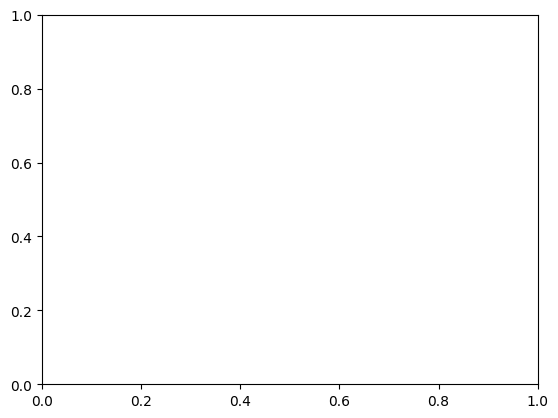

In [901]:
#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barh.html

plt.rcdefaults()
fig, ax = plt.subplots()

# y_data will be the titles
y_data = []

# x_data is number of weeks
top_refugee = top_refugee[:15]
x_data = top_refugee['Refugees (incl. refugee-like situations)']
y_data = top_refugee['Country']
# for index, row in max_data.iterrows():
#     # combine title with year
#     title_year = row['title'] + ' '+ '('+ row['year']+')'
#     y_data.append(title_year)

# plot data
ax.barh(y_data, x_data, color='k', align='center')

# label data
ax.set_yticks(y_data)
ax.set_yticklabels(y_data)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Refugees')
ax.set_title('Top Refugee Migrations')

plt.show()

In [589]:
top_refugee

,Country,CODE,Year,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Total Population,latitude,longitude
0,Turkey,TUR,2017,3424237,163,3424400,38.963745,35.243322
1,Turkey,TUR,2016,2823987,180,2824167,38.963745,35.243322
2,Turkey,TUR,2015,2503549,297,2503846,38.963745,35.243322
3,Turkey,TUR,2014,1557899,250,1558149,38.963745,35.243322
4,Lebanon,LBN,2014,1147494,417,1149903,33.854721,35.862285
5,Lebanon,LBN,2015,1062690,15,1064947,33.854721,35.862285
6,Lebanon,LBN,2016,1005503,10,1007749,33.854721,35.862285
7,Lebanon,LBN,2017,992127,8,994383,33.854721,35.862285
8,Lebanon,LBN,2013,851284,331,851616,33.854721,35.862285
9,Jordan,JOR,2017,653031,0,653031,30.585164,36.238414
